<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/UAS_Statistika_Kesehatan_%7C_Jeriko_%26_Benhard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn statsmodels openpyxl


=== 5 Data Awal ===
         Provinsi  Laki-laki  Perempuan  Rata-Rata
0            ACEH      68.52      72.45     70.485
1  SUMATERA UTARA      68.36      72.30     70.330
2  SUMATERA BARAT      68.41      72.35     70.380
3            RIAU      70.56      74.58     72.570
4           JAMBI      70.09      74.09     72.090

=== Statistik Deskriptif ===
       Laki-laki  Perempuan  Rata-Rata
count  39.000000  39.000000  39.000000
mean   68.636154  72.603333  70.619744
std     2.634092   2.651914   2.642378
min    62.830000  66.680000  64.755000
25%    66.960000  70.955000  68.957500
50%    69.000000  72.950000  70.975000
75%    70.355000  74.305000  72.330000
max    73.660000  77.400000  75.530000

=== Mean ===
Laki-laki    68.636154
Perempuan    72.603333
Rata-Rata    70.619744
dtype: float64

=== Median ===
Laki-laki    69.000
Perempuan    72.950
Rata-Rata    70.975
dtype: float64

=== Mode ===
    Laki-laki  Perempuan  Rata-Rata
0       65.05      66.68     64.755
1       73.21     

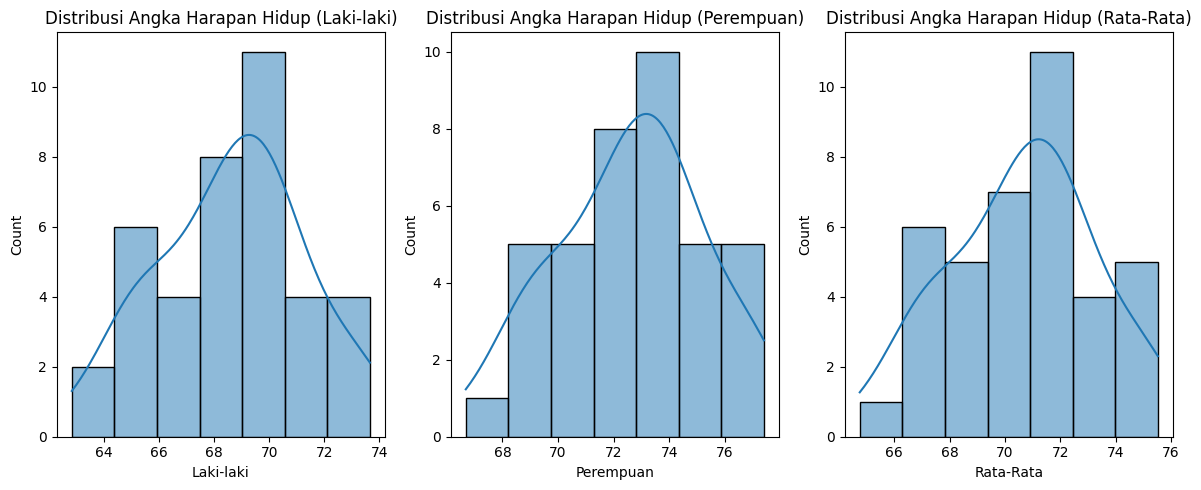

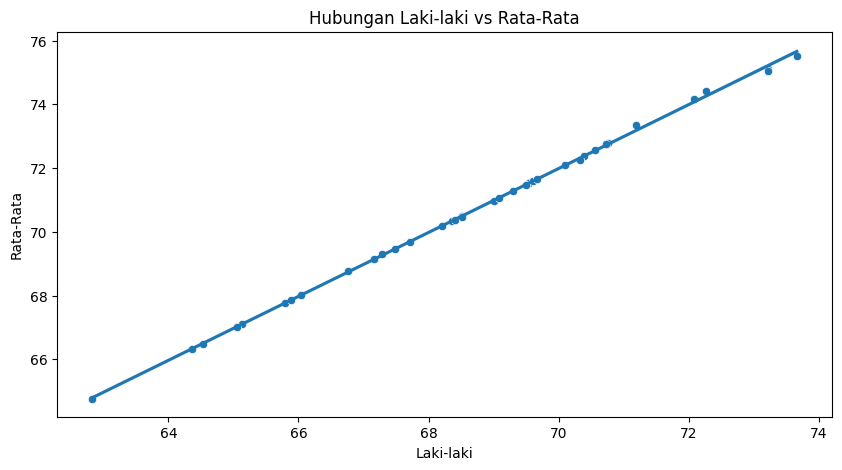

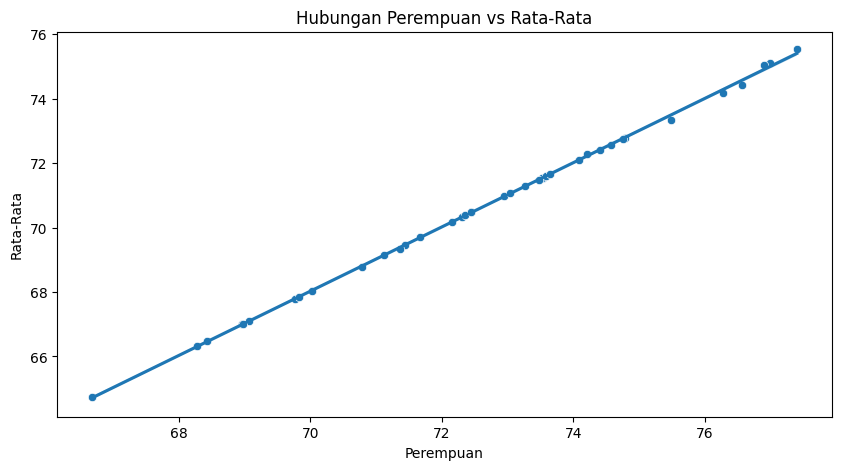


=== HASIL REGRESI BERGANDA ===
                            OLS Regression Results                            
Dep. Variable:              Rata-Rata   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.615e+27
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        04:05:57   Log-Likelihood:                 1082.0
No. Observations:                  39   AIC:                            -2158.
Df Residuals:                      36   BIC:                            -2153.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.684e-1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ==========================================
# 1. Load Data
# ==========================================
df = pd.read_excel("Data untuk UAS Statistika Kesehatan.xlsx", header=1)
df = df.rename(columns={"Unnamed: 0": "Provinsi"})

print("=== 5 Data Awal ===")
print(df.head())

# ==========================================
# 2. Statistik Deskriptif
# ==========================================
print("\n=== Statistik Deskriptif ===")
print(df[["Laki-laki","Perempuan","Rata-Rata"]].describe())

# Ukuran Pemusatan Data
mean_values = df[["Laki-laki","Perempuan","Rata-Rata"]].mean()
median_values = df[["Laki-laki","Perempuan","Rata-Rata"]].median()
mode_values = df[["Laki-laki","Perempuan","Rata-Rata"]].mode()

print("\n=== Mean ===")
print(mean_values)
print("\n=== Median ===")
print(median_values)
print("\n=== Mode ===")
print(mode_values)

# Ukuran Penyebaran Data
std_values = df[["Laki-laki","Perempuan","Rata-Rata"]].std()
var_values = df[["Laki-laki","Perempuan","Rata-Rata"]].var()
range_values = df[["Laki-laki","Perempuan","Rata-Rata"]].max() - df[["Laki-laki","Perempuan","Rata-Rata"]].min()

print("\n=== Standar Deviasi ===")
print(std_values)
print("\n=== Varians ===")
print(var_values)
print("\n=== Rentang (Range) ===")
print(range_values)

# ==========================================
# 3. Grafik
# ==========================================

# Histogram
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.histplot(df["Laki-laki"], kde=True)
plt.title("Distribusi Angka Harapan Hidup (Laki-laki)")

plt.subplot(1,3,2)
sns.histplot(df["Perempuan"], kde=True)
plt.title("Distribusi Angka Harapan Hidup (Perempuan)")

plt.subplot(1,3,3)
sns.histplot(df["Rata-Rata"], kde=True)
plt.title("Distribusi Angka Harapan Hidup (Rata-Rata)")

plt.tight_layout()
plt.show()

# Scatter plot hubungan
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Laki-laki"], y=df["Rata-Rata"])
sns.regplot(x=df["Laki-laki"], y=df["Rata-Rata"], scatter=False)
plt.title("Hubungan Laki-laki vs Rata-Rata")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Perempuan"], y=df["Rata-Rata"])
sns.regplot(x=df["Perempuan"], y=df["Rata-Rata"], scatter=False)
plt.title("Hubungan Perempuan vs Rata-Rata")
plt.show()

# ==========================================
# 4. Regresi Linier Berganda
# ==========================================

X = df[["Laki-laki","Perempuan"]]   # Variabel bebas
y = df["Rata-Rata"]                 # Variabel terikat

X = sm.add_constant(X)              # Tambah konstanta

model = sm.OLS(y, X).fit()

print("\n=== HASIL REGRESI BERGANDA ===")
print(model.summary())

